In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

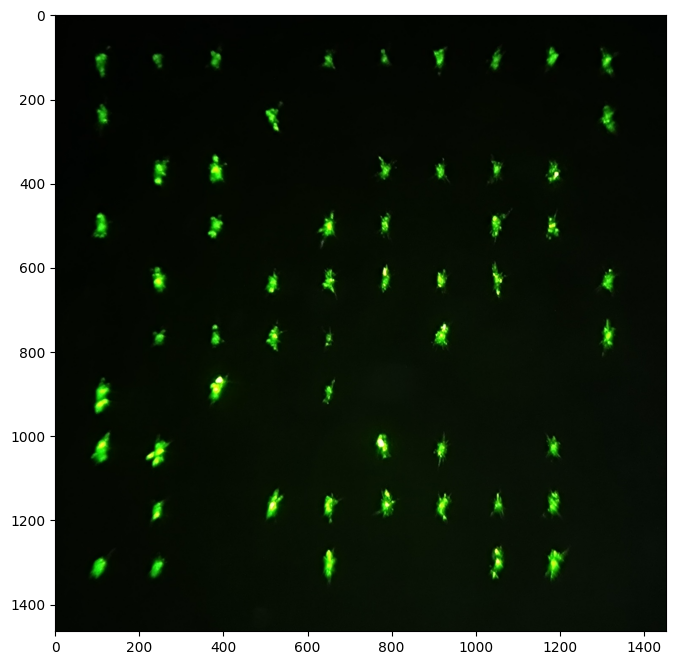

In [2]:
img = cv2.imread("20240510_193624_.JPG")
plt.rcParams['figure.figsize'] = [8, 8]
plt.imshow(img)

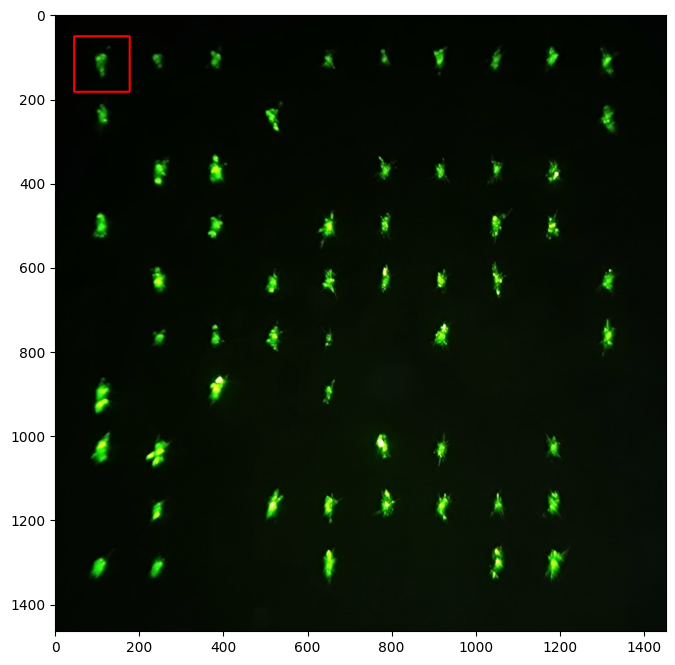

In [3]:
pt1 = np.array((45, 50))
rect_width = 132
rect_height = 132
pt2 = (pt1 + (rect_height, rect_width))
with_rect = cv2.rectangle(img.copy(), pt1=pt1, pt2=pt2, color=(255, 0, 0), thickness=3)

plt.imshow(with_rect)
plt.savefig('./plots/selected00.png')

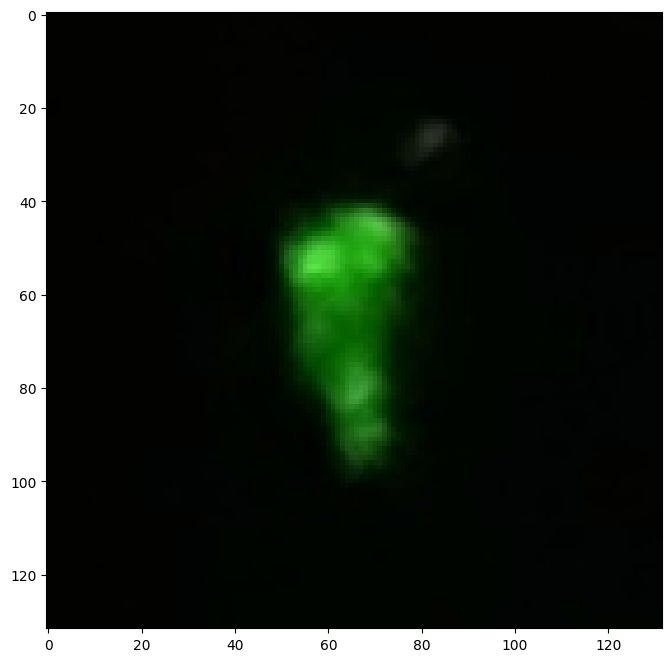

In [4]:
selected = img[pt1[1]:pt2[1], pt1[0]:pt2[0]]
plt.imshow(selected)
plt.savefig('./plots/bigselected.png')

In [5]:
rects = []
N = 10
M = 10
for i in range(N):
    for j in range(M):
        p1 = pt1 + (rect_height * j + 10, rect_width * i + 10)
        p2 = p1 + (rect_height - 10, rect_width - 10)
        rects.append(np.array((p1, p2)))

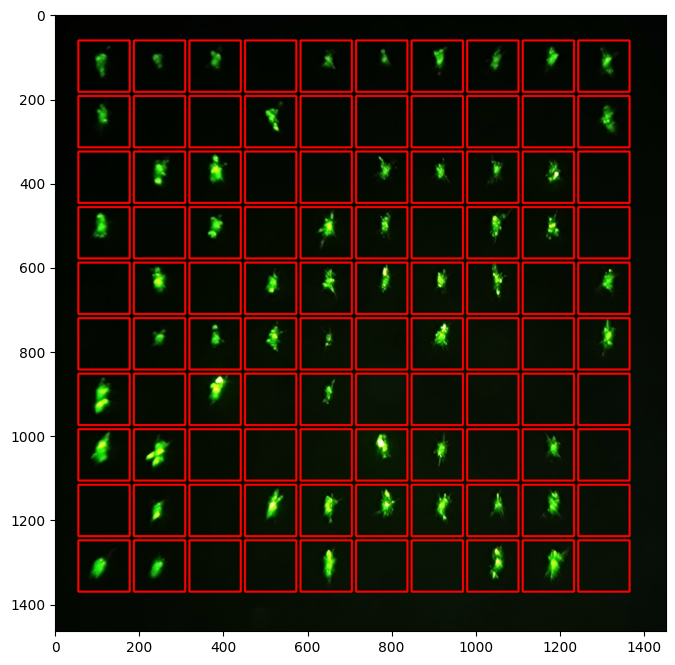

In [6]:
grid_img = img.copy()
for points_pair in rects:
    grid_img = cv2.rectangle(grid_img, pt1=points_pair[0], pt2=points_pair[1], color=(255, 0, 0), thickness=3)
plt.imshow(grid_img)
plt.savefig('./plots/base_grid.png')

In [7]:
images = [img[p1[1]:p2[1], p1[0]:p2[0]] for p1, p2 in rects]

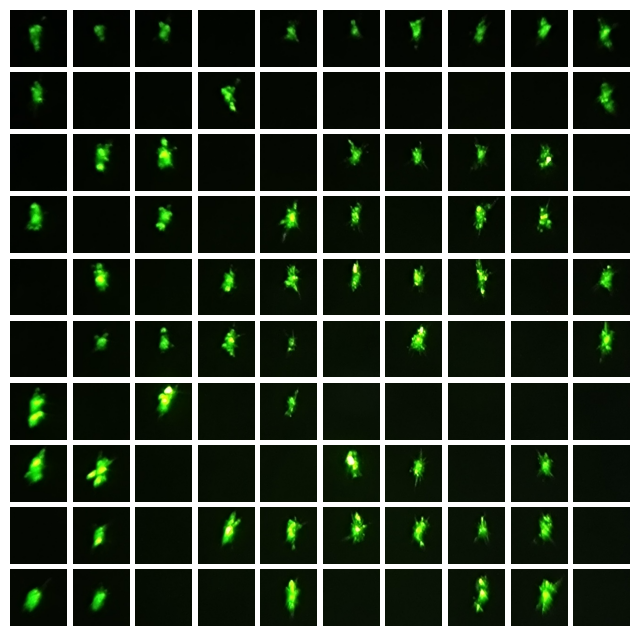

In [8]:
fig, axs = plt.subplots(N, M, figsize=(8, 8))
for i in range(N):
    for j in range(M):
        axs[i, j].imshow(images[i * M + j])
        axs[i, j].axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('./plots/divided_in_small_images.png')
plt.show()

In [9]:
def is_damaged(image):
    return np.max(image) > 50

In [10]:
marked_img = img.copy()
for p1, p2 in rects:
    image = img[p1[1]:p2[1], p1[0]:p2[0]]
    is_damaged(image)
    # if is_damaged(image):
    #     color = (255, 0, 0)
    # else:
    #     color = (0, 255, 0)
    # marked_img = cv2.rectangle(marked_img, pt1=p1, pt2=p2, color=color, thickness=3)
    
# plt.imshow(marked_img)
# plt.savefig('./plots/recognized_grid.png')
